In [29]:
""" ▶ Step 1. Flatten 레이어 되짚기 """

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten

input_ = np.arange(1, 13).reshape(3, 2, 2)
print(input_, '\n---------------')

reshaped = input_.reshape(1, 2, 2, 3)
print(reshaped, '\n---------------')

flatten = Flatten()
flattened = flatten(reshaped)
flattened2 = flatten(input_)
flattened3 = flatten(flattened2.numpy().reshape(1, 3, 4))
print(flattened, flattened2, flattened3, sep='\n---------------\n')

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]] 
---------------
[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]] 
---------------
tf.Tensor([[ 1  2  3  4  5  6  7  8  9 10 11 12]], shape=(1, 12), dtype=int32)
---------------
tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)
---------------
tf.Tensor([[ 1  2  3  4  5  6  7  8  9 10 11 12]], shape=(1, 12), dtype=int32)


![pooling.png](./etc/pooling.png)

In [66]:
""" ▶ Step 2. 단일 레이어를 구현하고, pooling 하기 """

from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

input_ = tf.constant([[12, 20, 30, 0],
                      [8, 12, 2, 0],
                      [24, 70, 37, 4],
                      [112, 100, 25, 12]], dtype=tf.float32)

row, col = input_.shape
input_reshaped = tf.reshape(input_, [1, row, col, 1])   # input_은 numpy객체가 아니고 tensor객체이므로 .reshape()가 아닌, tf.reshape()를 써야 한다.
print(input_reshaped, '\n---------------')

max_pooling_2d = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid') # strides (보폭)에 값을 안 주면, pool_size와 동일한 크기로 처리한다.
max_pooling_2d_output = max_pooling_2d(input_reshaped)
print('--- MaxPooling2D ----\n', max_pooling_2d_output.numpy(), max_pooling_2d_output.shape, '\n-------------')
print(max_pooling_2d_output.numpy().reshape(2,2))

tf.Tensor(
[[[[ 12.]
   [ 20.]
   [ 30.]
   [  0.]]

  [[  8.]
   [ 12.]
   [  2.]
   [  0.]]

  [[ 24.]
   [ 70.]
   [ 37.]
   [  4.]]

  [[112.]
   [100.]
   [ 25.]
   [ 12.]]]], shape=(1, 4, 4, 1), dtype=float32) 
---------------
--- MaxPooling2D ----
 [[[[ 20.]
   [ 30.]]

  [[112.]
   [ 37.]]]] (1, 2, 2, 1) 
-------------
[[ 20.  30.]
 [112.  37.]]


In [67]:
""" ▶ Step 2-1. 단일 레이어를 구현하고, pooling 하기 """

average_pooling_2d = AveragePooling2D(pool_size=(2,2), padding='valid')
average_pooling_2d_output = average_pooling_2d(input_reshaped)

print('--- AveragePooling2D ----\n', average_pooling_2d_output.numpy(), '\n-------------')
print(np.round(average_pooling_2d_output.numpy().reshape(2,2)))

global_max_pooling_2d = GlobalMaxPooling2D()
global_max_pooling_2d_output = global_max_pooling_2d(input_reshaped)
print('--- GlobalMaxPooling2D ----\n', global_max_pooling_2d_output.numpy())

global_average_pooling_2d = GlobalAveragePooling2D()
global_average_pooling_2d_output = global_average_pooling_2d(input_reshaped)
print('--- GlobalAveragePooling2D ----\n', global_average_pooling_2d_output.numpy())

--- AveragePooling2D ----
 [[[[13. ]
   [ 8. ]]

  [[76.5]
   [19.5]]]] 
-------------
[[13.  8.]
 [76. 20.]]
--- GlobalMaxPooling2D ----
 [[112.]]
--- GlobalAveragePooling2D ----
 [[29.25]]


[[253. 253. 253. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]
 ...
 [253. 253. 253. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]] (270, 232) -> (135, 116)
[[255.]] (1, 1)


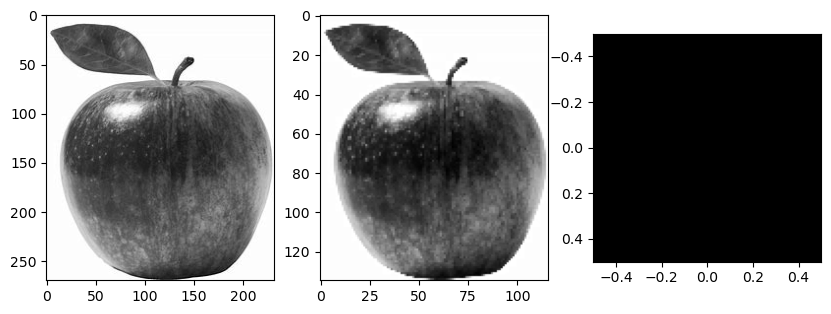

In [74]:
""" ▶ Step 3. 실제 이미지로 pooling/서브샘플링 연습하기 """

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./etc/apple.jpg', 0)
row, col = img.shape

input_ = tf.constant(img, dtype=tf.float32)
input_reshaped = tf.reshape(input_, [1, row, col, 1])

max_pooling_2d = MaxPooling2D(pool_size=(2,2), padding='valid')    # strides 생략
max_pooling_2d_output = max_pooling_2d(input_reshaped)
print((temp := tf.squeeze(max_pooling_2d_output)).numpy(), img.shape, '->',temp.shape)
# reshape 말고 tf.squeeze(max_pool_2d_output) 을 사용해서 1인 차원을 없앨 수 있다.

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(temp, cmap='gray')

global_max_pooling_2d = GlobalMaxPooling2D()
global_max_pooling_2d_output = global_max_pooling_2d(input_reshaped)
plt.subplot(1, 3, 3)
plt.imshow(global_max_pooling_2d_output, cmap='gray')      # 당연하게도 global은 최대값 1픽셀만 나온다.
print(global_max_pooling_2d_output.numpy(), global_max_pooling_2d_output.shape)

In [105]:
""" ▶ Step 4. Conv2D 단일 레이어를 구현하자 """
"""    tf.keras.layers.Conv2D(
        filters,                   -> 출력 차원 수
        kernel_size,               -> 필터 크기. 리스트,튜플 뿐만이 아니라 정수도 가능.
        strides=(1, 1),            -> 마찬가지로 정수 가능. default는 1 혹은 (1, 1)이다.
        padding='valid',           -> padding='same' 입출력 이미지와 동일한 크기를 갖도록 주변에 패딩을 주겠다.
                                   -> padding='valid' 입력데이터가 폴링윈도우 크기로 나눠 떨어지지 않을 경우, 나머지 부분은 무시된다.
        data_format=None,
        dilation_rate=(1, 1),
        groups=1,
        activation=None,
        use_bias=True,             -> True / False
        kernel_initializer='glorot_uniform',      -> 커널(Weight) 초기화값.
        bias_initializer='zeros',                 -> 편향(bias) 초기화값.
"""

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D

input_ = tf.constant([[12, 20, 30, 0],
                      [8, 12, 2, 0],
                      [24, 70, 37, 4],
                      [112, 100, 25, 12]], dtype=tf.float32)
input_reshaped = tf.reshape(input_, [1, 4, 4, 1])

conv2d = Conv2D(filters=1,  kernel_size=2,  strides=1,  padding='same',  activation='relu',  use_bias=False,  kernel_initializer='ones')
conv2d_output_padding_same = conv2d(input_reshaped)
conv2d = Conv2D(filters=1,  kernel_size=2,  strides=1,  padding='valid',  activation='relu',  use_bias=False,  kernel_initializer='ones')
conv2d_output_padding_valid = conv2d(input_reshaped)

print("padding='same' ---", conv2d_output_padding_same.shape, tf.squeeze(conv2d_output_padding_same), '--------------', sep='\n')
print("padding='valid' ---", conv2d_output_padding_valid.shape, tf.squeeze(conv2d_output_padding_valid), '--------------', sep='\n')

max_pooling_2d = MaxPooling2D(pool_size=2, strides=2, padding='valid')
max_pooling_2d_output = max_pooling_2d(conv2d_output_padding_valid)

print(max_pooling_2d_output.numpy().reshape(-1))    # squeeze 대신 걍 써봄.
# 그리고 3*3 에서 pool_size와 strides를 2주니까 1*1크기만 나옴.

padding='same' ---
(1, 4, 4, 1)
tf.Tensor(
[[ 52.  64.  32.   0.]
 [114. 121.  43.   4.]
 [306. 232.  78.  16.]
 [212. 125.  37.  12.]], shape=(4, 4), dtype=float32)
--------------
padding='valid' ---
(1, 3, 3, 1)
tf.Tensor(
[[ 52.  64.  32.]
 [114. 121.  43.]
 [306. 232.  78.]], shape=(3, 3), dtype=float32)
--------------
[121.]


In [ ]:
"""
<< Conv2D 레이어의 기능: 분류 >>

1. 특징 추출: 특징을 자동으로 추출 및 학습함. 가장자리, 모서리, 질감 등을 추출 가능.
2. 차원 축소: 입력이미지를 차원 축소하면, net파라미터 수가 줄어든다. 고로, 계산 효율이 높아지며 과적합이 방지된다.
3. 공간 계층 구조: 이미지 공간계층을 이용해서 저수준, 고수준 추상 특징 추출이 용이하다.
4. 파라미터 공유: 같은 커널을 이미지의 모든 위치에 적용
5. 이동불변성: 이미지 내의 객체 위치가 달라져도 동일한 특징을 인식할 수 있다.
"""